 
<font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 2 (Aula P3) </div> </font> 

         
  <font size="5"> Licenciatura em Ciência de Dados </font>
  
  
  <font size="4"> **Diana Aldea Mendes**</font>
  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 19 de fevereiro de 2024 </font>
     
 
 
  <font size="5"> <div class="alert alert-success" role="alert"> Regressão Linear Simples </div></font> 
  

  

In [ ]:
# carregar as bibliotecas que vamos usar neste notebook / script

library(dplyr) # para importar data frames
library(tidyr)
library(gmodels)
library(matrixStats)
library(corrplot)
library(MASS) # very large collection of data sets and functions.


## Tabela de dados

In [1]:
# inserir os dados (data.frame)
data1 <- data.frame(
    driving = c(5, 2, 12, 9, 15, 6, 25, 16, 23, 21, 16, 17, 23, 18, 21, 11, 29, 19, 6, 23, 12, 7, 8),
    premium = c(64, 57, 50, 71, 44, 56, 42, 60, 34, 54, 44, 61, 39, 43, 52, 38, 41, 48, 32, 41, 28, 29, 21)
)

# visualizar a tabela de dados
data1


driving,premium
<dbl>,<dbl>
5,64
2,57
12,50
9,71
15,44
6,56
25,42
16,60
23,34


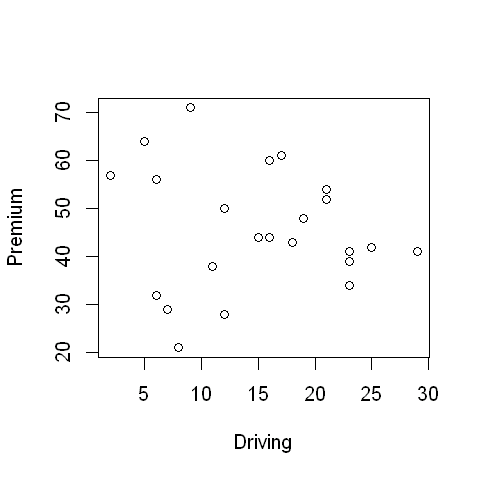

In [2]:
# extrair a variável independente,x, e a variável dependente, y,
y <- data1$premium
x <- data1$driving

# definir o tamanho da figura
options(repr.plot.width = 4, repr.plot.height = 4)

# diagrama de dispersão
plot(x, y, xlab = "Driving", ylab = "Premium")


## Correlação de Pearson

###################################################################################

Vamos calcular o coeficiente de correlação de Pearson, usando a fórmula definida na aula teórica, isto é:

$$ R= \frac{SS_{xy}}{\sqrt{SS_{xx}}\sqrt{SS_{yy}}} $$


In [ ]:
# calcular o coeficiente de correlação de Pearson

xbar <- mean(x) # média de x
ybar <- mean(y) # média de y
n <- length(y) # comprimento de y (número de observações)

# definir a tabela com as variáveis, quadrado das variáveis, produto das variáveis
# x-média(x), y-média(y),(x-média(x))*(y-média(y))

data.frame(
    xi = x, yi = y, xiyi = x * y, x.squared = x^2, y.squared = y^2,
    x_c = x - xbar, y_c = y - ybar, x_cy_c = (x - xbar) * (y - ybar)
)


xi,yi,xiyi,x.squared,y.squared,x_c,y_c,x_cy_c
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,64,320,25,4096,-9.95652174,18.391304,-183.11342155
2,57,114,4,3249,-12.95652174,11.391304,-147.59168242
12,50,600,144,2500,-2.95652174,4.391304,-12.98298677
9,71,639,81,5041,-5.95652174,25.391304,-151.24385633
15,44,660,225,1936,0.04347826,-1.608696,-0.06994329
6,56,336,36,3136,-8.95652174,10.391304,-93.06994329
25,42,1050,625,1764,10.04347826,-3.608696,-36.24385633
16,60,960,256,3600,1.04347826,14.391304,15.01701323
23,34,782,529,1156,8.04347826,-11.608696,-93.37429112


In [4]:
# definir SSxy
SSxy <- sum(x * y) - n * xbar * ybar
SSxy

# ou equivalente : SSxy <- sum((x-xbar)*(y-ybar))


[1] -229.3913

In [5]:
# definir SSxx
SSxx <- sum(x^2) - n * xbar^2
SSxx

# ou equivalente: SSxx <- sum((x-xbar)^2)


[1] 1204.957

In [6]:
# definir SSyy

SSyy <- sum(y^2) - n * ybar^2
SSyy

# ou equivalente: SSyy <- sum((y-ybar)^2)


[1] 3481.478

In [7]:
# logo, o coeficiente de correlação de Pearson é
r <- SSxy / (sqrt(SSxx) * sqrt(SSyy))
r


[1] -0.1119978

In [8]:
# coeficiente de determinação
r^2


[1] 0.0125435

## Estimar os coeficientes de regressão

Relembra-se que, usando o método de estimação dos mínimos quadrados, os parametros podem ser estimados com base nas seguintes fórmulas:

$$ \widehat{\beta}_1 = \frac{SS_{xy}}{SS_{xx}} $$
e 
$$ \widehat{\beta}_0 = \overline{y}-\widehat{\beta}_1 \overline{x}$$

In [9]:
# calcular beta_1

xbar <- mean(x)
ybar <- mean(y)
n <- length(y)
SSxy <- sum(x * y) - n * xbar * ybar
SSxx <- sum(x^2) - n * xbar^2
SSyy <- sum(y^2) - n * ybar^2

beta1 <- SSxy / SSxx
beta1


[1] -0.1903731

In [10]:
# calcular beta_0

beta0 <- ybar - beta1 * xbar
beta0


[1] 48.45602

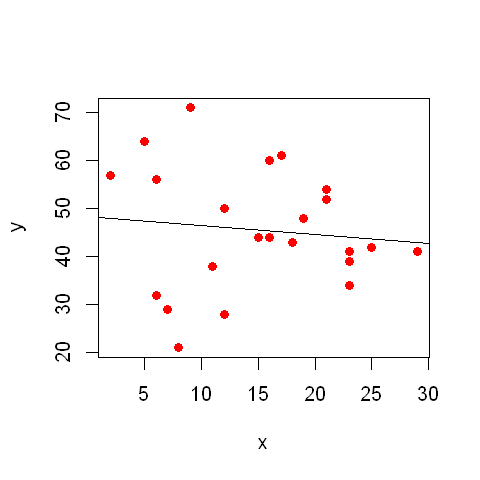

In [11]:
# gráfico de dispersão e reta de regressão
plot(x, y, pch = 19, col = "red", cex = 1.0)
abline(a = beta0, b = beta1)


## Valores estimados pela regressão, resíduos e soma dos quadrados dos resíduos

In [12]:
# vamos formar uma tabela (data frame) com os valores de y estimados pela reta de regressão
# resíduos e soma dos quadrados dos resíduos (SSE)

fitted1 <- beta0 + beta1 * x # reta de regressão
fitted0 <- rep(ybar, n) # replicar os valores da média de y, n=8 vezes
residual1 <- y - fitted1 # resíduos 1
residual0 <- y - fitted0 # resíduos 2

data.frame(y, fitted0, residual0, fitted1, residual1, diff.res = fitted1 - fitted0)


y,fitted0,residual0,fitted1,residual1,diff.res
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
64,45.6087,18.391304,47.50415,16.495850,1.895453875
57,45.6087,11.391304,48.07527,8.924731,2.466573165
50,45.6087,4.391304,46.17154,3.828462,0.562842199
71,45.6087,25.391304,46.74266,24.257343,1.133961489
44,45.6087,-1.608696,45.60042,-1.600419,-0.008277091
56,45.6087,10.391304,47.31378,8.686224,1.705080779
42,45.6087,-3.608696,43.69669,-1.696688,-1.912008057
60,45.6087,14.391304,45.41005,14.589955,-0.198650188
34,45.6087,-11.608696,44.07743,-10.077434,-1.531261864


Warning message in arrows(x[i], fitted0[i], x[i], fitted1[i], length = 0.1, col = 2):
"zero-length arrow is of indeterminate angle and so skipped"


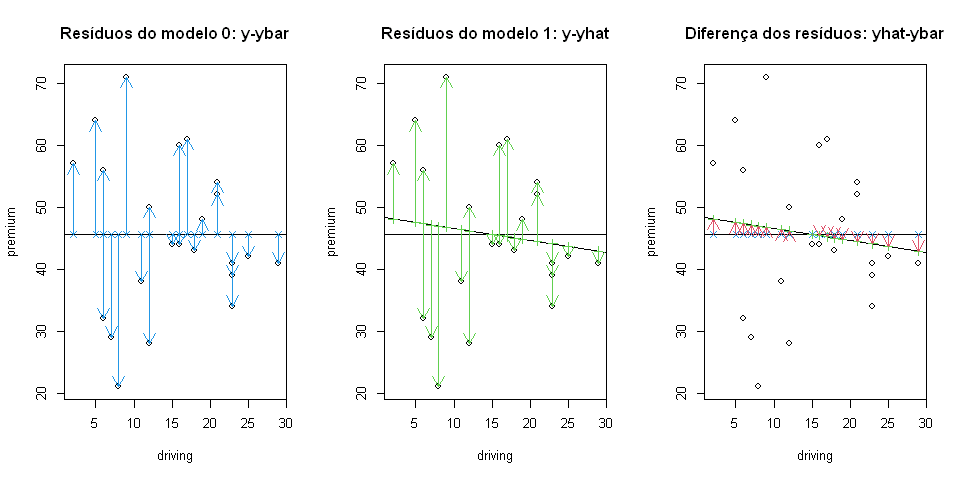

In [13]:
# visualizar a reta de regressão, os valores estimados/preditos e os resíduos

# definir o tamanho da figura
options(repr.plot.width = 8, repr.plot.height = 4)

# definimos 3 figuras em linha (1x3)
par(mfrow = c(1, 3))
plot(premium ~ driving, data = data1, ylim = range(y, fitted1, fitted0))
abline(h = mean(y))
points(x, fitted0, pch = 4, col = 4)
for (i in 1:length(y)) {
    arrows(x[i], fitted0[i], x[i], y[i], length = 0.1, col = 4)
}
title(main = "Resíduos do modelo 0: y-ybar")


plot(premium ~ driving, data = data1, ylim = range(y, fitted1, fitted0))
abline(h = mean(y))
abline(a = beta0, b = beta1)
points(x, fitted1, pch = 3, col = 3)
for (i in 1:length(y)) {
    arrows(x[i], fitted1[i], x[i], y[i], length = 0.1, col = 3)
}
title(main = "Resíduos do modelo 1: y-yhat")


plot(premium ~ driving, data = data1, ylim = range(y, fitted1, fitted0))
abline(h = mean(y))
abline(a = beta0, b = beta1)
points(x, fitted0, pch = 4, col = 4)
points(x, fitted1, pch = 3, col = 3)

for (i in 1:length(y)) {
    arrows(x[i], fitted0[i], x[i], fitted1[i], length = 0.1, col = 2)
}
title(main = "Diferença dos resíduos: yhat-ybar")


In [14]:
# soma dos quadrados dos resíduos (SSE)

SSE <- sum((y - fitted1)^2)
SSE


[1] 3437.808

## Inferência estatística sobre $\beta_1$

Para fazer inferência sobre $\beta_1$, precisamos calcular o erro padrão de $ \widehat{\beta}_1$, isto é

$$ \widehat{s}(\beta_1)= \frac{s_{e}}{\sqrt{SS_{xx}}} $$
onde 
$$ s_e = \sqrt{\frac{SSE}{(n-2)}}$$
é o desvio padrão dos resíduos.

In [15]:
# erro padrão de beta_1

sd_e <- sqrt(SSE / (n - 2))
# desvio padrão dos resíduos
sd_e

se_beta1 <- sd_e / sqrt(SSxx)
se_beta1


[1] 12.79473

[1] 0.3685917

In [16]:
# definir a estatística teste

tstat <- beta1 / se_beta1
tstat


[1] -0.5164878

In [17]:
# para testar a hipótese nula H0: beta1=0, vamos calcular o p-value

2 * pt(-abs(beta1) / se_beta1, df = n - 2)


[1] 0.6109102

In [18]:
# como o p-value > 0.05, não se rejeita a H0, logo beta1 é zero
# e a variável x não é estatisticamente significativa


In [19]:
# finalmente, vamos ver o intervalo de confiança para beta1

alpha <- 0.05
me_beta1 <- qt(alpha / 2, df = n - 2, lower.tail = FALSE) * se_beta1
# 95% CI:
beta1 + c(-me_beta1, me_beta1)


[1] -0.9569014  0.5761552

In [20]:
# ou: mais simples, usando algumas funções predefinidas de R

xbar <- mean(x)
ybar <- mean(y)
n <- length(y)
SSxy <- sum(x * y) - n * xbar * ybar
SSxx <- sum(x^2) - n * xbar^2
SSyy <- sum(y^2) - n * ybar^2

# estimar a reta de regressão:
beta1 <- SSxy / SSxx
beta0 <- ybar - beta1 * xbar


## Easy Way

In [21]:
# ou: the easy way
# todo o trabalho anterior resumido em apenas 2 linhas de comandos
# falta confirmar que os valores obtidos anteriormente, aparecem também no output

modelo_1 <- lm(premium ~ driving, data = data1)

# summary ou o output do modelo de regressão
summary(modelo_1)



Call:
lm(formula = premium ~ driving, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.933  -6.720  -1.600   8.806  24.257 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.4560     6.1245   7.912 9.83e-08 ***
driving      -0.1904     0.3686  -0.516    0.611    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.79 on 21 degrees of freedom
Multiple R-squared:  0.01254,	Adjusted R-squared:  -0.03448 
F-statistic: 0.2668 on 1 and 21 DF,  p-value: 0.6109


In [22]:
# intervalos de confiança (associados aos parâmetros estimados)
confint(modelo_1)


,2.5 %,97.5 %
(Intercept),35.7194845,61.1925455
driving,-0.9569014,0.5761552


In [23]:
# nomes das variáveis no output da função 'lm'

names(modelo_1)


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [24]:
# vamos ver então os coeficientes do reta de regressão

modelo_1$coefficients


(Intercept)     driving 
 48.4560150  -0.1903731

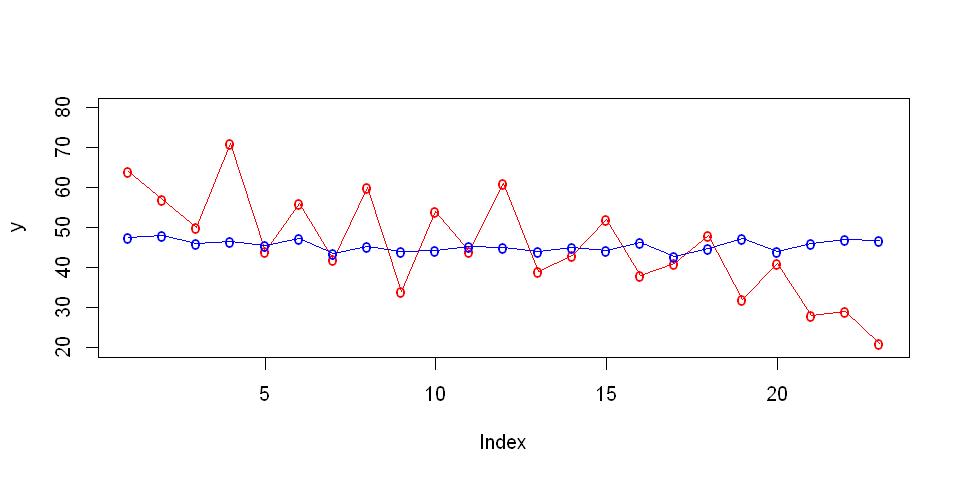

In [25]:
# comparação entre y e y-predito (fitted.values)

plot(y, col = "red", type = "o", pch = "o", lty = 1, ylim = c(20, 80))
lines(modelo_1$fitted.values, type = "o", col = "blue", pch = "o")


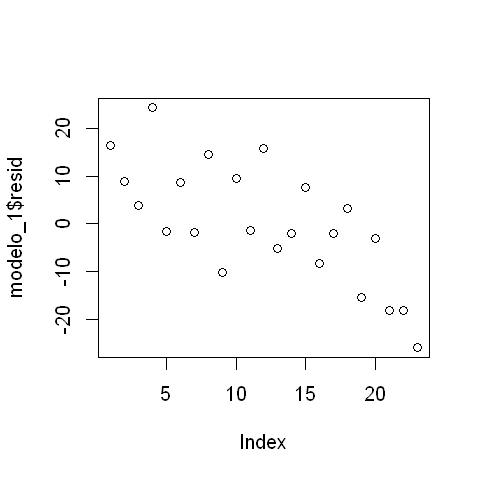

In [26]:
# definir o tamanho da figura
options(repr.plot.width = 4, repr.plot.height = 4)

# representar graficamente os resíduos do modelo_1

plot(modelo_1$resid)


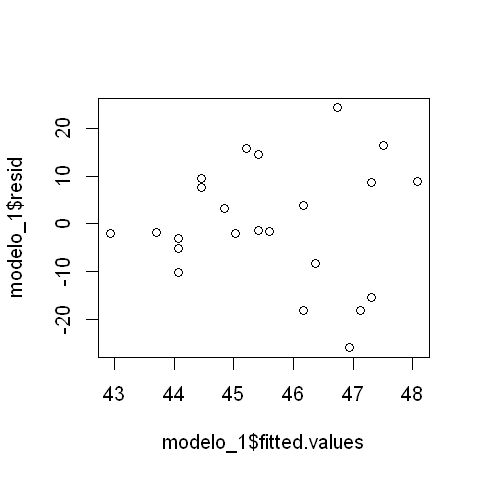

In [27]:
# verificação dos pressupostos dos resíduos de ponto de vista visual
# observa-se que a média é nula

# gráfico de dispersão entre resíduos e valores preditos de y

plot(modelo_1$fitted.values, modelo_1$resid)

# como temos poucos pontos não conseguimos observar nem padrões não-lineares e
# nem se a variância é constante (gráfico em forma de funil)


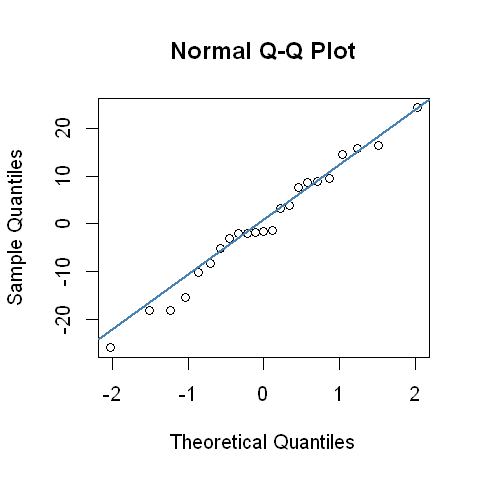

In [28]:
# verificamos se os resíduos são normalmente distribuídos, usando o QQ-plot

qqnorm(modelo_1$resid, pch = 1)
qqline(modelo_1$resid, col = "steelblue", lwd = 2)


Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"


[1] 23  4

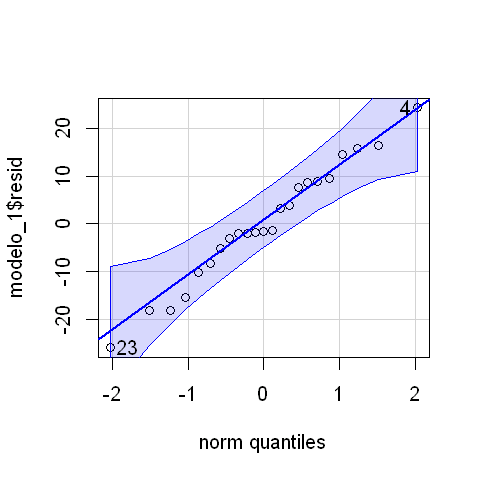

In [29]:
# QQ-plot usando a biblioteca "car"
library("car")
qqPlot(modelo_1$resid)


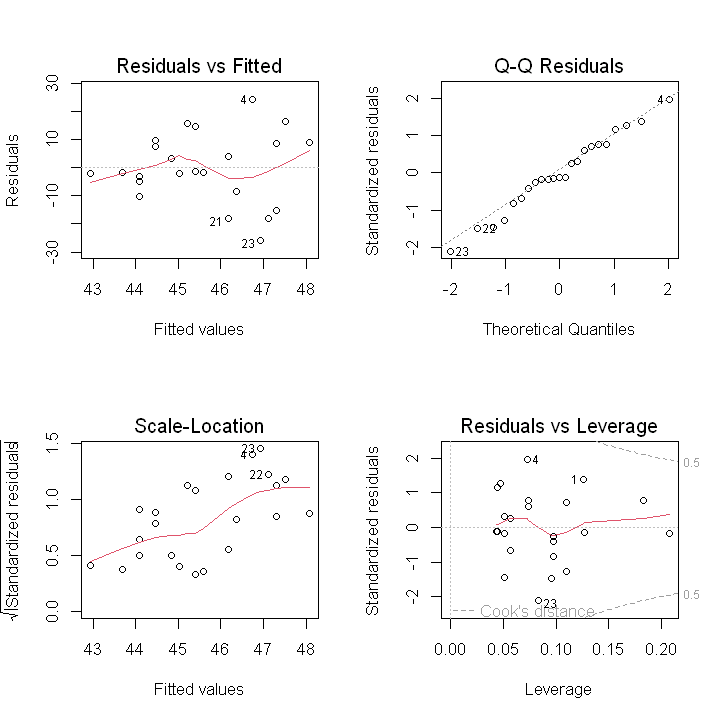

In [30]:
# definir o tamanho da figura
options(repr.plot.width = 6, repr.plot.height = 6)

# tudo de uma vez

par(mfrow = c(2, 2))
plot(modelo_1)
